<a href="https://colab.research.google.com/github/mousDZ/DevOps-Guide/blob/master/rains_de_030222.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description du projet

##Objectif
prédire si il y a aura de la pluie le lendemain

##Type
Classification

##Piste de travail	
- completer les valeurs manquantes
- normaliser/binariser
- supprimer les variables inutiles
- construire des variables temporelles passées

##Lien
https://assets-datascientest.s3-eu-west-1.amazonaws.com/de/total/rains.csv

# Importation librairies

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importation des données et premières visualisations

In [260]:
df = pd.read_csv("https://assets-datascientest.s3-eu-west-1.amazonaws.com/de/total/rains.csv")

In [261]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Newcastle,13.2,NaN,0.0,NaN,NaN,NaN,NaN,NW,NW,6.0,19.0,50.0,24.0,NaN,NaN,3.0,4.0,21.8,30.6,No,No
1,2008-12-02,Newcastle,NaN,32.2,0.0,NaN,NaN,NaN,NaN,NaN,NE,NaN,19.0,NaN,59.0,NaN,NaN,NaN,0.0,NaN,25.4,No,No
2,2008-12-03,Newcastle,16.2,32.2,0.0,NaN,NaN,NaN,NaN,N,SE,2.0,2.0,74.0,26.0,NaN,NaN,4.0,4.0,22.2,32.0,No,No
3,2008-12-04,Newcastle,19.2,24.0,0.0,NaN,NaN,NaN,NaN,SE,SE,22.0,22.0,66.0,61.0,NaN,NaN,7.0,5.0,20.4,23.0,No,No
4,2008-12-05,Newcastle,18.8,30.2,0.0,NaN,NaN,NaN,NaN,NE,NaN,4.0,NaN,85.0,NaN,NaN,NaN,8.0,NaN,20.0,NaN,No,No


In [262]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,24781.000000,24885.000000,24570.000000,16385.000000,16142.000000,21011.000000,25073.000000,24389.000000,24800.000000,24141.000000,21854.000000,21852.000000,16480.000000,15527.000000,24883.000000,24183.000000
mean,13.255958,23.627928,2.568637,5.180128,7.598346,38.323021,12.250668,17.501989,66.912621,51.880742,1018.254873,1015.802009,4.214078,4.237264,17.850520,22.018224
std,5.828184,5.911984,8.955230,3.421251,3.796346,13.483681,9.282323,9.349560,16.448132,17.757020,6.786389,6.637024,2.858866,2.699229,5.931133,5.722596
min,-8.000000,4.100000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,3.000000,4.000000,982.300000,985.500000,0.000000,0.000000,-1.300000,3.700000
25%,9.500000,19.400000,0.000000,2.600000,4.800000,30.000000,6.000000,11.000000,56.000000,40.000000,1013.700000,1011.300000,1.000000,1.000000,13.600000,18.000000
50%,13.500000,23.500000,0.000000,4.600000,8.500000,37.000000,11.000000,17.000000,67.000000,52.000000,1018.200000,1015.800000,5.000000,5.000000,17.800000,21.900000
75%,17.600000,27.700000,0.800000,7.200000,10.500000,46.000000,17.000000,22.000000,78.000000,63.000000,1022.800000,1020.300000,7.000000,7.000000,22.300000,25.900000
max,33.900000,46.400000,240.000000,44.000000,13.900000,122.000000,130.000000,87.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,39.000000,45.400000


In [263]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [264]:
df.isna().sum()

Date                 0
Location             0
MinTemp            850
MaxTemp            746
Rainfall          1061
Evaporation       9246
Sunshine          9489
WindGustDir       4622
WindGustSpeed     4620
WindDir9am        2611
WindDir3pm        1684
WindSpeed9am       558
WindSpeed3pm      1242
Humidity9am        831
Humidity3pm       1490
Pressure9am       3777
Pressure3pm       3779
Cloud9am          9151
Cloud3pm         10104
Temp9am            748
Temp3pm           1448
RainToday         1061
RainTomorrow      1062
dtype: int64

In [265]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25631 entries, 0 to 25630
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           25631 non-null  object 
 1   Location       25631 non-null  object 
 2   MinTemp        24781 non-null  float64
 3   MaxTemp        24885 non-null  float64
 4   Rainfall       24570 non-null  float64
 5   Evaporation    16385 non-null  float64
 6   Sunshine       16142 non-null  float64
 7   WindGustDir    21009 non-null  object 
 8   WindGustSpeed  21011 non-null  float64
 9   WindDir9am     23020 non-null  object 
 10  WindDir3pm     23947 non-null  object 
 11  WindSpeed9am   25073 non-null  float64
 12  WindSpeed3pm   24389 non-null  float64
 13  Humidity9am    24800 non-null  float64
 14  Humidity3pm    24141 non-null  float64
 15  Pressure9am    21854 non-null  float64
 16  Pressure3pm    21852 non-null  float64
 17  Cloud9am       16480 non-null  float64
 18  Cloud3

## Séparation des variables Categorielles et Numeriques 

In [266]:
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
print("nombre de variables categorielles: {}".format(len(categorical_features)))
print("variables categorielles: ",categorical_features)
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
print("nombre de variable numerique: {}".format(len(numerical_features)))
print("variables numeriques : ",numerical_features)

nombre de variables categorielles: 7
variables categorielles:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
nombre de variable numerique: 16
variables numeriques :  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [267]:
df.describe(include=[np.number])

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,24781.000000,24885.000000,24570.000000,16385.000000,16142.000000,21011.000000,25073.000000,24389.000000,24800.000000,24141.000000,21854.000000,21852.000000,16480.000000,15527.000000,24883.000000,24183.000000
mean,13.255958,23.627928,2.568637,5.180128,7.598346,38.323021,12.250668,17.501989,66.912621,51.880742,1018.254873,1015.802009,4.214078,4.237264,17.850520,22.018224
std,5.828184,5.911984,8.955230,3.421251,3.796346,13.483681,9.282323,9.349560,16.448132,17.757020,6.786389,6.637024,2.858866,2.699229,5.931133,5.722596
min,-8.000000,4.100000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,3.000000,4.000000,982.300000,985.500000,0.000000,0.000000,-1.300000,3.700000
25%,9.500000,19.400000,0.000000,2.600000,4.800000,30.000000,6.000000,11.000000,56.000000,40.000000,1013.700000,1011.300000,1.000000,1.000000,13.600000,18.000000
50%,13.500000,23.500000,0.000000,4.600000,8.500000,37.000000,11.000000,17.000000,67.000000,52.000000,1018.200000,1015.800000,5.000000,5.000000,17.800000,21.900000
75%,17.600000,27.700000,0.800000,7.200000,10.500000,46.000000,17.000000,22.000000,78.000000,63.000000,1022.800000,1020.300000,7.000000,7.000000,22.300000,25.900000
max,33.900000,46.400000,240.000000,44.000000,13.900000,122.000000,130.000000,87.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,39.000000,45.400000


In [268]:
df.describe(exclude=[np.number])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,25631,25631,21009,23020,23947,24570,24569
unique,3436,8,16,16,16,2,2
top,2016-05-19,Canberra,SSE,N,SE,No,No
freq,8,3436,1833,2196,2357,18890,18891




---


## normalisation et nettoyage des données

### calcul de la cardinalité des variables categorielles 

In [269]:
for each_feature in categorical_features:
   unique_values = len(df[each_feature].unique())
   print("cardinalité(des valeurs uniques) de la variable categorielle {} sont: {}".format(each_feature, unique_values))

cardinalité(des valeurs uniques) de la variable categorielle Date sont: 3436
cardinalité(des valeurs uniques) de la variable categorielle Location sont: 8
cardinalité(des valeurs uniques) de la variable categorielle WindGustDir sont: 17
cardinalité(des valeurs uniques) de la variable categorielle WindDir9am sont: 17
cardinalité(des valeurs uniques) de la variable categorielle WindDir3pm sont: 17
cardinalité(des valeurs uniques) de la variable categorielle RainToday sont: 3
cardinalité(des valeurs uniques) de la variable categorielle RainTomorrow sont: 3


conclusion : date a une cardinalité trop grande, on va la remplacer par 3 (jour, mois et année)

In [270]:

df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df.drop('Date', axis = 1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Newcastle,13.2,NaN,0.0,NaN,NaN,NaN,NaN,NW,NW,6.0,19.0,50.0,24.0,NaN,NaN,3.0,4.0,21.8,30.6,No,No,2008,12,1
1,Newcastle,NaN,32.2,0.0,NaN,NaN,NaN,NaN,NaN,NE,NaN,19.0,NaN,59.0,NaN,NaN,NaN,0.0,NaN,25.4,No,No,2008,12,2
2,Newcastle,16.2,32.2,0.0,NaN,NaN,NaN,NaN,N,SE,2.0,2.0,74.0,26.0,NaN,NaN,4.0,4.0,22.2,32.0,No,No,2008,12,3
3,Newcastle,19.2,24.0,0.0,NaN,NaN,NaN,NaN,SE,SE,22.0,22.0,66.0,61.0,NaN,NaN,7.0,5.0,20.4,23.0,No,No,2008,12,4
4,Newcastle,18.8,30.2,0.0,NaN,NaN,NaN,NaN,NE,NaN,4.0,NaN,85.0,NaN,NaN,NaN,8.0,NaN,20.0,NaN,No,No,2008,12,5





### Completion des valeurs manquantes NA

In [271]:
# on remplace les na numeriques avec leur valeur médian
num_data = df.select_dtypes(include=np.number).fillna(df.select_dtypes(include=np.number).median())

In [272]:
# on remplace les na catégoriels avec leur mode
cat_data = df.select_dtypes(exclude=np.number).fillna(df.select_dtypes(exclude=np.number).mode().loc[0])

In [273]:
# on reconstruit le dataframe
df = pd.concat([num_data, cat_data], axis=1)



### Recherche des valeurs aberrantes

In [274]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
count,25631.000000,25631.000000,25631.000000,25631.000000,25631.000000,25631.000000,25631.000000,25631.000000,25631.000000,25631.000000,25631.000000,25631.000000,25631.000000,25631.000000,25631.000000,25631.000000,25631.000000,25631.000000,25631.000000
mean,13.264051,23.624205,2.462307,4.970856,7.932152,38.084546,12.223440,17.477664,66.915454,51.887675,1018.246787,1015.801712,4.494674,4.537942,17.849046,22.011545,2012.486208,6.480473,15.717452
std,5.730892,5.825350,8.782830,2.749548,3.044003,12.218664,9.182536,9.120849,16.179294,17.233162,6.266457,6.128225,2.323093,2.133661,5.843950,5.558660,2.670403,3.430566,8.797256
min,-8.000000,4.100000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,3.000000,4.000000,982.300000,985.500000,0.000000,0.000000,-1.300000,3.700000,2007.000000,1.000000,1.000000
25%,9.600000,19.500000,0.000000,3.600000,7.200000,30.000000,6.000000,11.000000,57.000000,41.000000,1014.700000,1012.200000,3.000000,3.000000,13.700000,18.200000,2010.000000,3.000000,8.000000
50%,13.500000,23.500000,0.000000,4.600000,8.500000,37.000000,11.000000,17.000000,67.000000,52.000000,1018.200000,1015.800000,5.000000,5.000000,17.800000,21.900000,2013.000000,6.000000,16.000000
75%,17.500000,27.600000,0.600000,5.600000,9.400000,43.000000,17.000000,22.000000,78.000000,62.000000,1022.000000,1019.400000,6.000000,6.000000,22.200000,25.600000,2015.000000,9.000000,23.000000
max,33.900000,46.400000,240.000000,44.000000,13.900000,122.000000,130.000000,87.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,39.000000,45.400000,2017.000000,12.000000,31.000000


à premiere vue, la variable numérique "rainfall" contient des valeur aberrante ( 240 alors que la moyenne est 2, il y a un facteur de 100)


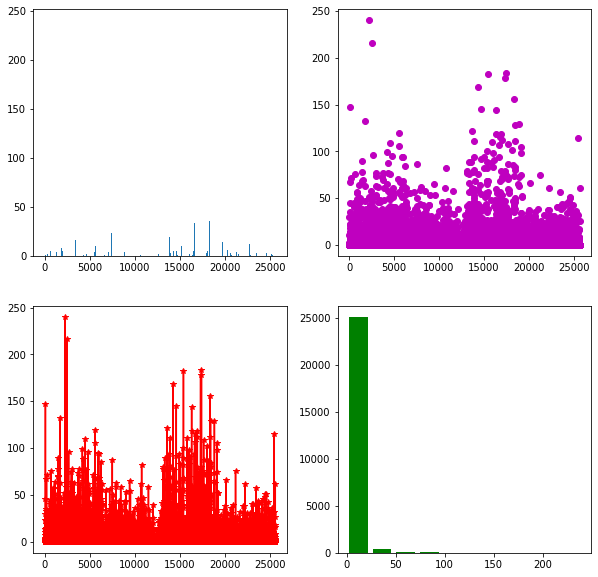

In [275]:
fig = plt.figure(figsize=(10,10))

plt.subplot(221)
plt.bar(range(len(df)), df.Rainfall, label = 'Rainfall')

plt.subplot(222)
plt.scatter(range(len(df)), df.Rainfall, c = 'm', label = "Rainfall")

plt.subplot(223)
plt.plot(df.Rainfall,'r-*', label = "Rainfall")

plt.subplot(224)
plt.hist(df.Rainfall, color='green', rwidth = 0.8, label = "Rainfall");

les graphiques montre quelques valeurs qui se détachent qui peuvent être abérant.

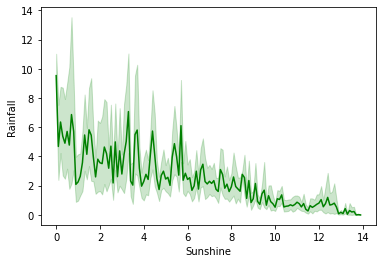

In [284]:
import seaborn as sns

#df['RainTomorrow'].value_counts().plot(kind='bar')
sns.lineplot(data=df,x='Sunshine',y='Rainfall',color='green')



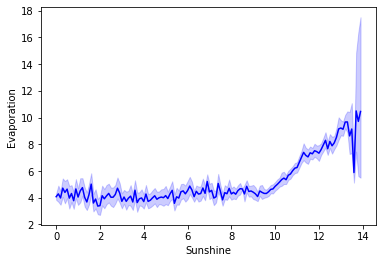

In [286]:
sns.lineplot(data=df,x='Sunshine',y='Evaporation',color='blue')


In [287]:
def encode_categorial(feature_name):

    mapping_dict = {}

    unique_values = list(df[feature_name].unique())

    for idx in range(len(unique_values)):

        mapping_dict[unique_values[idx]] = idx

    return mapping_dict

df["RainTomorrow"] = df.RainTomorrow.eq('Yes').mul(1)
df["RainToday"] = df.RainToday.eq('Yes').mul(1)

df['WindGustDir'].replace(encode_categorial('WindGustDir'),inplace = True)

df['WindDir9am'].replace(encode_categorial('WindDir9am'),inplace = True)

df['WindDir3pm'].replace(encode_categorial('WindDir3pm'),inplace = True)

df['Location'].replace(encode_categorial('Location'), inplace = True)

##Correlation

In [297]:

corr = df.corr()
plt.figure(figsize=(26,26))
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
MinTemp,1.00,0.72,0.09,0.40,0.05,0.11,0.11,0.11,-0.17,0.18,-0.41,-0.40,0.12,0.05,0.90,0.68,0.07,-0.22,0.01,0.09,-0.05,0.09,0.00,0.08,0.11
MaxTemp,0.72,1.00,-0.07,0.48,0.37,0.00,-0.07,0.02,-0.41,-0.31,-0.31,-0.38,-0.18,-0.20,0.87,0.96,0.08,-0.19,0.01,0.12,-0.04,0.08,-0.02,-0.20,-0.12
Rainfall,0.09,-0.07,1.00,-0.07,-0.15,0.11,0.08,0.03,0.26,0.25,-0.13,-0.09,0.16,0.13,0.01,-0.08,-0.00,-0.04,0.00,-0.03,-0.02,0.00,-0.01,0.51,0.22
Evaporation,0.40,0.48,-0.07,1.00,0.30,0.15,0.07,0.09,-0.40,-0.23,-0.28,-0.28,-0.09,-0.13,0.46,0.47,0.02,-0.04,0.00,0.08,0.03,0.08,0.01,-0.16,-0.08
Sunshine,0.05,0.37,-0.15,0.30,1.00,-0.05,-0.07,0.03,-0.36,-0.44,0.02,-0.03,-0.50,-0.54,0.22,0.39,0.04,0.02,0.00,0.09,-0.03,0.03,-0.03,-0.24,-0.34
WindGustSpeed,0.11,0.00,0.11,0.15,-0.05,1.00,0.58,0.65,-0.14,0.00,-0.40,-0.35,0.09,0.12,0.06,-0.04,-0.05,0.05,-0.00,-0.10,0.06,-0.07,-0.00,0.13,0.19
WindSpeed9am,0.11,-0.07,0.08,0.07,-0.07,0.58,1.00,0.58,-0.22,0.02,-0.18,-0.13,0.06,0.10,0.05,-0.09,-0.04,0.04,-0.01,0.05,0.13,0.01,0.09,0.09,0.07
WindSpeed3pm,0.11,0.02,0.03,0.09,0.03,0.65,0.58,1.00,-0.15,-0.00,-0.23,-0.21,0.07,0.06,0.10,-0.01,-0.02,0.05,-0.01,-0.00,0.07,-0.01,0.06,0.04,0.03
Humidity9am,-0.17,-0.41,0.26,-0.40,-0.36,-0.14,-0.22,-0.15,1.00,0.59,0.15,0.17,0.31,0.24,-0.39,-0.40,0.03,-0.13,0.02,-0.24,-0.10,-0.10,-0.05,0.37,0.26
Humidity3pm,0.18,-0.31,0.25,-0.23,-0.44,0.00,0.02,-0.00,0.59,1.00,-0.04,0.01,0.36,0.39,-0.01,-0.39,0.04,-0.04,0.02,-0.09,-0.07,-0.04,-0.01,0.34,0.43


<Figure size 1872x1872 with 0 Axes>

on constate qu'il y a une forte correlation entre:
*   MinTemp et Temp9am 
*   MaxTemp et Temp3pm
*  Pressure9am et Pressure3pm






---

table de contingence : RainToday et RainTomorrow

---



In [277]:

#df["RainTomorrow"] = df.RainTomorrow.eq('Yes').mul(1)
#df["RainToday"] = df.RainToday.eq('Yes').mul(1)
tableRDRT=pd.crosstab(df["RainTomorrow"],df["RainToday"])
tableRDRT

RainToday,No,Yes
RainTomorrow,,
No,16849,3104
Yes,3102,2576


In [278]:
from scipy.stats import chi2_contingency
resultatsRDRT=chi2_contingency(tableRDRT)
resultatsRDRT
statistique = resultatsRDRT[0]
p_valeur = resultatsRDRT[1]
degre_liberte = resultatsRDRT[2]

print(f' les valeurs table de contingence :\n* statistique {statistique},\n* p_valeur:{p_valeur},\n* degre_liberte:{degre_liberte}')

 les valeurs table de contingence :
* statistique 2275.5951982826828,
* p_valeur:0.0,
* degre_liberte:1


p_valeur est 0 donc RainToday et RainTomorrow sont dépendantes. (H0 : les deux variables sont independantes a été rejetté)

p_valeur est 0 donc Location et RainTomorrow sont dépendantes. (H0 : les deux variables sont independantes a été rejetté)

# Creation variables explicatives et target

In [299]:
X = df.drop('RainTomorrow', axis=1)

In [300]:
y = df['RainTomorrow']

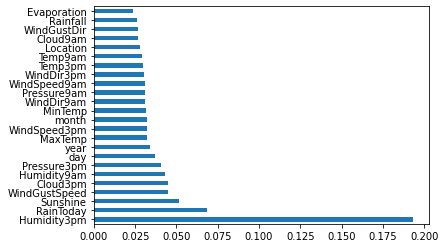

In [304]:
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)
etr_model.feature_importances_
feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(25).plot(kind='barh');

#séparation de la data trainning et data test

In [306]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

print(f"taille du data trainning: {len(X_train)}")
print(f"taille du data test: {len(X_test)}")

taille du data trainning: 20504
taille du data test: 5127


##standarisation de la data :

In [307]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#entrainement du model

In [317]:
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(solver='newton-cg', random_state=0)
classifier_logreg.fit(X_train, y_train)
y_pred = classifier_logreg.predict(X_test)
y_pred


from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))
print("Train Data Score: {}".format(classifier_logreg.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_logreg.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
y_pred_logreg_proba = classifier_logreg.predict_proba(X_test)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("\n Vrais négatifs:",tn,"\n Faux positifs:",fp,"\n Faux négatifs:",fn,"\n Vrais positifs:",tp)

from sklearn.metrics import balanced_accuracy_score

print("Balanced accuracy:",balanced_accuracy_score(y_test,y_pred))

Accuracy Score: 0.8482543397698459
Train Data Score: 0.8404701521654311
Test Data Score: 0.8482543397698459
[[3828  188]
 [ 590  521]]

 Vrais négatifs: 3828 
 Faux positifs: 188 
 Faux négatifs: 590 
 Vrais positifs: 521
Balanced accuracy: 0.7110670728427424


on est dans le cas deséquilibre des classe.
on essaye d'autres algorithme pour améliorer la prédiction

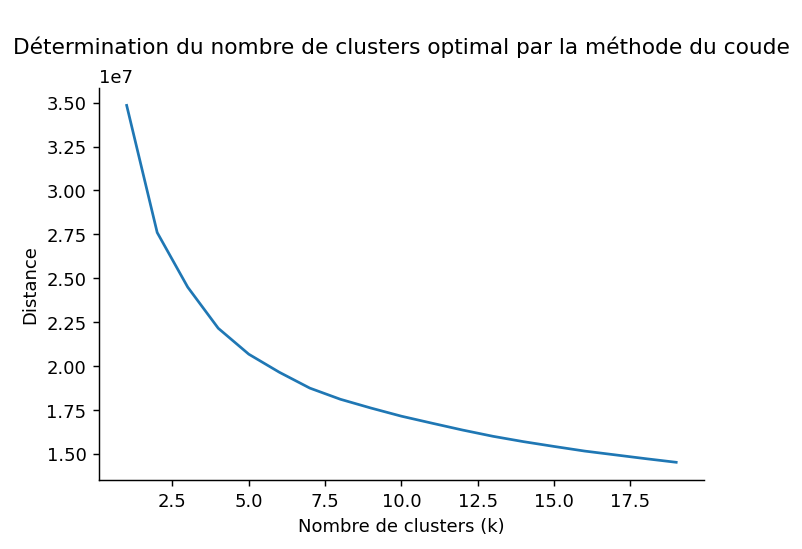

In [319]:
from sklearn.cluster import KMeans

# On définit une liste de k 

K = np.arange(1,20).tolist()
liste=[]

# A l'aide d'une boucle, on ajoute à une liste la somme des distances pour chaque k

for k in K:
    clust = KMeans(n_clusters=k, random_state=42).fit(X)
    liste.append(clust.inertia_)
    
import matplotlib.pyplot as plt

%matplotlib inline

fig,ax=plt.subplots(dpi=130)

# On retire l'axe supérieur et l'axe de droite du graphique

ax.spines['right'].set_visible(False)

ax.spines['top'].set_visible(False)

# On conserve les graduations de l'axe du bas et de gauche

ax.yaxis.set_ticks_position('left') 

ax.xaxis.set_ticks_position('bottom') 

# On affiche le graphique

plt.plot(K, liste)

# On définit le nom des axes

plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Distance")
plt.title('\nDétermination du nombre de clusters optimal par la méthode du coude\n')
plt.show();

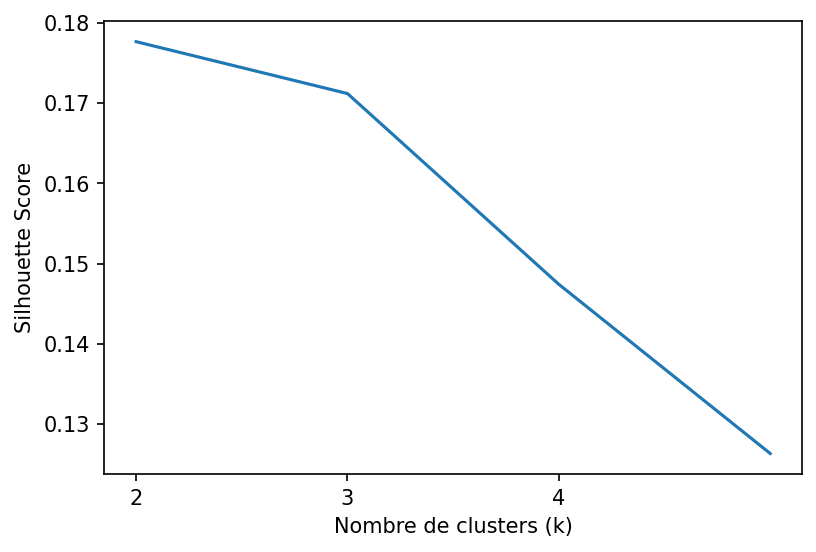

In [321]:
from sklearn.metrics import silhouette_score

K = np.arange(2,6).tolist()

# A l'aide d'une boucle, on ajoute à une liste le silhouette score pour chaque k

liste=[]
for k in K:
    k_means=KMeans(n_clusters=k, random_state=42)
    k_means.fit(X)
    liste.append(silhouette_score(X,k_means.labels_))

# On affiche le graphique

plt.figure(dpi=150)
plt.plot(K, liste)
plt.xticks(np.arange(min(np.arange(2,5)), max(np.arange(2,5))+1, 1.0))

# On définit le nom des axes

plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Silhouette Score")
plt.show();

Choix de 3 clusters : 

Cluster 0 : 
 0    2961
1    1434
Name: y, dtype: int64 

Cluster 1 : 
 0    2877
1    2662
Name: y, dtype: int64 



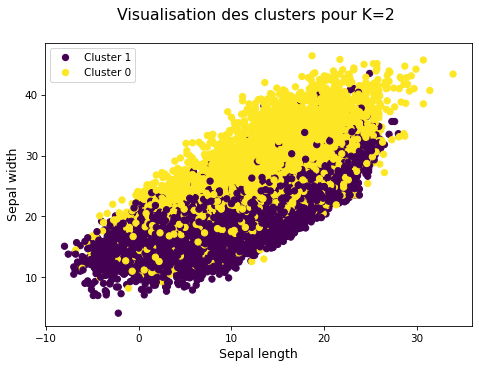

In [333]:

X_i=X.copy()


# On applique l'algorithme des KMeans pour un nombre de clusters égal à 3

kmeans_I=KMeans(n_clusters=4, random_state=42)

kmeans_I.fit_predict(X_i)

X_i['clusters']=pd.Series(kmeans_I.labels_)
data_i=pd.DataFrame(X_i['clusters'])

data_i['y']=pd.Series(y)

print("Choix de 3 clusters : \n")

for i in range(0,2):
    print("Cluster",i,": \n", data_i.loc[data_i['clusters']==i]['y'].value_counts(),"\n")
kmi = KMeans(n_clusters=2).fit(X)
classes_i=['Cluster 1','Cluster 0',]
plt.figure(figsize=(25,5),dpi=75)
plt.subplot(132)
scatter=plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmi.labels_)
plt.title("Visualisation des clusters pour K=2 \n",fontsize=15)
plt.xlabel("Sepal length",fontsize=12)
plt.ylabel("Sepal width",fontsize=12)
plt.legend(handles=scatter.legend_elements()[0], labels=classes_i)
plt.show();

In [335]:
# A partir du module linear_model de la librairie scikit learn on importe la fonction LinearRegression

from sklearn.linear_model import LinearRegression 

model=LinearRegression()

# A partir du module model_selection de la librairie scikit learn on importe la fonction cross_validate

from sklearn.model_selection import cross_val_score

performances_ = cross_val_score(model, X, y, cv=5,scoring='r2')
from sklearn.model_selection import KFold
folds_1 = KFold(n_splits = 5, shuffle = False)

folds_2 = KFold(n_splits = 5, shuffle = True, random_state=42)

performances_non_shuffled = cross_val_score(model, X, y, scoring='r2', cv=folds_1)

performances_shuffled = cross_val_score(model, X, y, scoring='r2', cv=folds_2)

print(performances_non_shuffled)
print(performances_shuffled)
print(" Les performances obtenues sur chacun des splits est de:\n\n", performances_, "\n\nEn moyenne cela donne donc un R2 de:",np.mean(performances_),
      " \n\n Les performances obtenues sur chacun des splits avec un découpage successif des folds sans mélange est de:\n\n", performances_non_shuffled,"\n\nEn moyenne cela donne donc un R2 de:",np.mean(performances_non_shuffled),
      "\n\n Les performances obtenues sur chaque des splits après un mélange des observations de la base est de:\n\n", performances_shuffled, "\n\nEn moyenne cela donne donc un R2 de:",np.mean(performances_shuffled))

print("\n On constate que les performances sont bien plus homogènes lorsque les observations sont mélangées. La fonction cross_val_score ne mélange pas les observations avant de mesurer les performances.")

[0.15839577 0.30437623 0.24270826 0.2684614  0.34641465]
[0.29402262 0.29232352 0.29828893 0.30000325 0.29129326]
 Les performances obtenues sur chacun des splits est de:

 [0.15839577 0.30437623 0.24270826 0.2684614  0.34641465] 

En moyenne cela donne donc un R2 de: 0.26407126173416345  

 Les performances obtenues sur chacun des splits avec un découpage successif des folds sans mélange est de:

 [0.15839577 0.30437623 0.24270826 0.2684614  0.34641465] 

En moyenne cela donne donc un R2 de: 0.26407126173416345 

 Les performances obtenues sur chaque des splits après un mélange des observations de la base est de:

 [0.29402262 0.29232352 0.29828893 0.30000325 0.29129326] 

En moyenne cela donne donc un R2 de: 0.2951863166941903

 On constate que les performances sont bien plus homogènes lorsque les observations sont mélangées. La fonction cross_val_score ne mélange pas les observations avant de mesurer les performances.


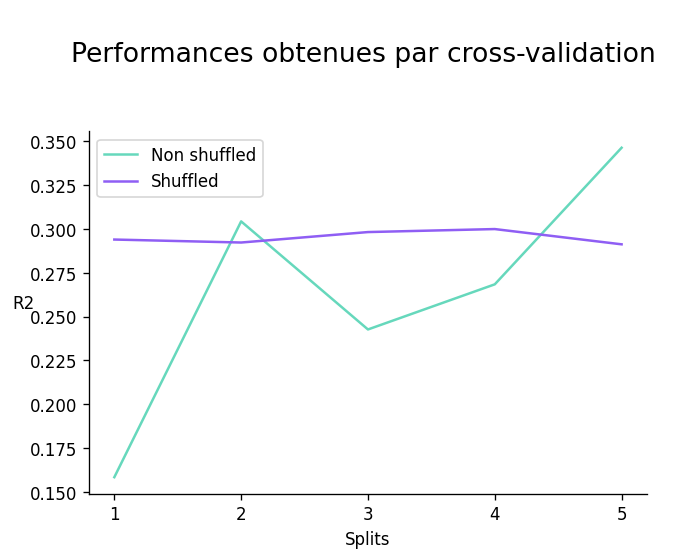

In [336]:
import numpy as np

import matplotlib.pyplot as plt

# On définit la qualité de l'affichage

fig,ax = plt.subplots(dpi=120)

# On retire l'axe supérieur et l'axe de droite du graphique

ax.spines['right'].set_visible(False)

ax.spines['top'].set_visible(False)

# On conserve les graduations de l'axe du bas et de gauche

ax.yaxis.set_ticks_position('left') 

ax.xaxis.set_ticks_position('bottom') 

# On nomme les axes 

plt.xlabel("Splits")

plt.ylabel("R2", rotation=0)

# On affiche les performances issues du dataset non mélangé

plt.plot(np.arange(1,6),performances_non_shuffled,label="Non shuffled",color="#66d8bc")

# On affiche les performances issues du dataset  mélangé

plt.plot(np.arange(1,6),performances_shuffled,label="Shuffled",color="#8f5ef4")

# On définit les graduations de l'axe des abscisses pour que ce soit des entiers 

plt.xticks(np.arange(1, 6, step=1))

# On affiche la légende des courbes 

plt.legend(loc=0)

# On affiche le titre du graphique

plt.title("\nPerformances obtenues par cross-validation \n\n",fontsize=16);